In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [6]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


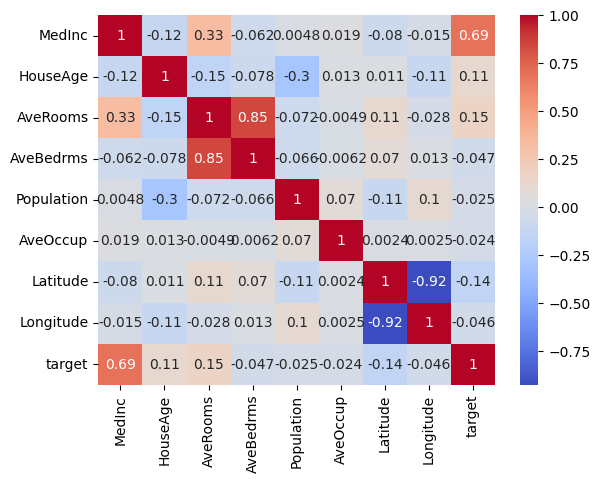

In [9]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [10]:
X=df.drop('target', axis=1)
y=df['target']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
model1=LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [14]:
model2=RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)

In [16]:
mse=mean_squared_error(y_test, y_pred1)
r2=r2_score(y_test, y_pred1)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.555891598695244
R2: 0.5757877060324511


In [17]:
mse=mean_squared_error(y_test, y_pred2)
r2=r2_score(y_test, y_pred2)
print(f"MSE: {mse}")
print(f"R2: {r2}")

MSE: 0.2577176094009222
R2: 0.8033304001420353


In [18]:
from sklearn.model_selection import cross_val_score
scores1=cross_val_score(model1, X_train, y_train, cv=5)
scores2=cross_val_score(model2, X_train, y_train, cv=5)
print(f"Cross-validation scores for model1: {scores1}")
print(f"Cross-validation scores for model2: {scores2}")

Cross-validation scores for model1: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Cross-validation scores for model2: [0.80724285 0.79460506 0.80722561 0.80694083 0.80539885]


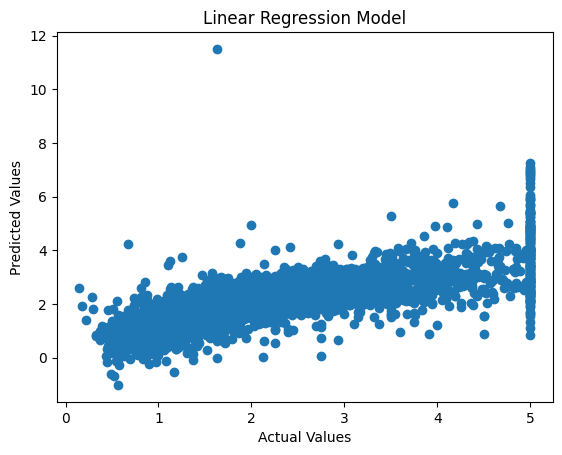

In [19]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model")
plt.show()

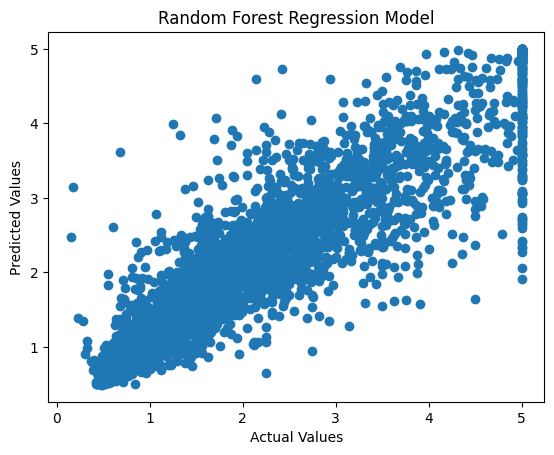

In [20]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Model")
plt.show()